In [1]:
import sys
import os
sys.path.append('./src/')
sys.path.append('./rcwa_pt/src/')
import utils
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import time
import solver_pt
import solver_metasurface_pt

In [2]:
# Get list of files.
dirs = ['./results/nearfield_030822/', './results/nearfield_040822/', './results/nearfield_120822/']
files = [[os.path.join(d, f) for f in os.listdir(d) if os.path.isfile(os.path.join(d, f))] for d in dirs]
files = [f for d in files for f in d]

# Find file with highest quality solution.
#eval_scores = [solver_metasurface_pt.load_result(f)['eval_score'] for f in files]
#idx_best = np.argmax(eval_scores)
#filename = files[idx_best]
filename = './results/nearfield_030822/nearfield-180x180-N50-sigmoid_update40.0-learning_rate0.4-initial_height0.txt'
print(filename)

result = solver_metasurface_pt.load_result(filename)

loss = result['loss']
focal_plane = result['focal_plane']
h = result['h']

batchSize = 1
pixelsX = h.shape[0]
pixelsY = h.shape[1]
Nlay = 6
Nx = 16
Ny = 16
ers = 11.9
urd = 1.0
eps_min = 1.0
eps_max = 11.9
sigmoid_coeff = result['hyperparameters'][1] + 1

params = {'batchSize' : batchSize,
         'pixelsX' : pixelsX,
         'pixelsY' : pixelsY,
         'Nlay' : Nlay,
         'Nx' : Nx,
         'Ny' : Ny,
         'ers' : ers,
         'urd' : urd,
         'eps_min' : eps_min,
         'eps_max' : eps_max,
         'sigmoid_coeff' : sigmoid_coeff}
print(params)

./results/nearfield_030822/nearfield-180x180-N50-sigmoid_update40.0-learning_rate0.4-initial_height0.txt
{'batchSize': 1, 'pixelsX': 180, 'pixelsY': 180, 'Nlay': 6, 'Nx': 16, 'Ny': 16, 'ers': 11.9, 'urd': 1.0, 'eps_min': 1.0, 'eps_max': 11.9, 'sigmoid_coeff': 41.0}


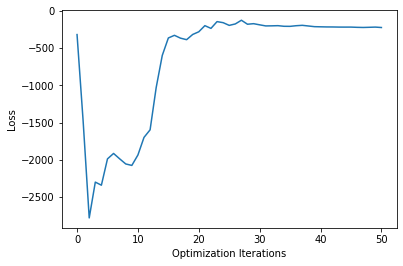

In [3]:
plt.plot(loss)
plt.xlabel('Optimization Iterations')
plt.ylabel('Loss')
plt.show()

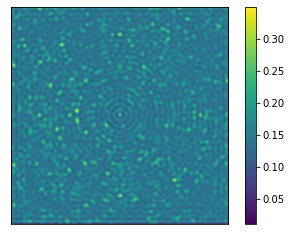

In [4]:
fig = plt.imshow(torch.abs(focal_plane[0, :, :]) ** 2)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.colorbar()

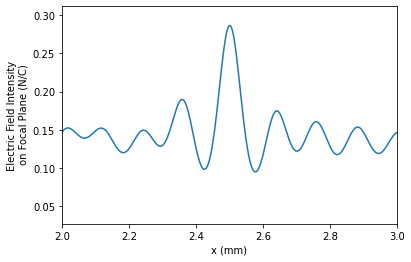

In [5]:
index = (pixelsY * 11) // 2
x = np.linspace(0, 5, focal_plane.shape[2])
plt.plot(x, torch.abs(focal_plane[0, index, :]) ** 2)
plt.xlabel('x (mm)')
plt.ylabel('Electric Field Intensity\n on Focal Plane (N/C)')
plt.xlim(2,3)
plt.show()

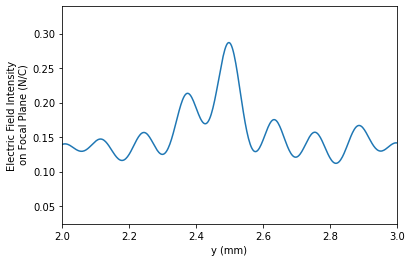

In [6]:
index = (pixelsX * 11) // 2
x = np.linspace(0, 5, focal_plane.shape[2])
plt.plot(x, torch.abs(focal_plane[0, :, index]) ** 2)
plt.xlabel('y (mm)')
plt.ylabel('Electric Field Intensity\n on Focal Plane (N/C)')
plt.xlim(2,3)
plt.show()

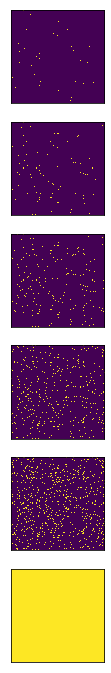

In [7]:
ER_t, UR_t = solver_metasurface_pt.generate_layered_metasurface(h, params)
solver_metasurface_pt.display_layered_metasurface(ER_t, params)

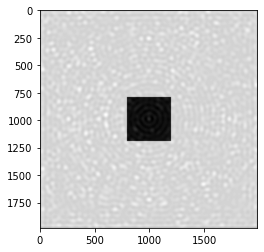

In [8]:
r = 200
# norm=colors.Normalize(0,2,False),
colormap = 'binary'
focal_plane_masked = np.squeeze(focal_plane)
idx = focal_plane_masked.shape[0] // 2
focal_plane_masked[idx-r:idx+r, idx-r:idx+r] = focal_plane_masked[idx-r:idx+r, idx-r:idx+r] + 1.0

plt.imshow(focal_plane_masked, cmap=colormap)
box_props = dict(facecolor='white', edgecolor='black')
#plt.text(640,500,'First Loss Term', backgroundcolor='w', bbox=box_props)
#plt.text(600,1600,'Second Loss Term', backgroundcolor='w', bbox=box_props)
#plt.arrow(1000,500,0,300)